In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

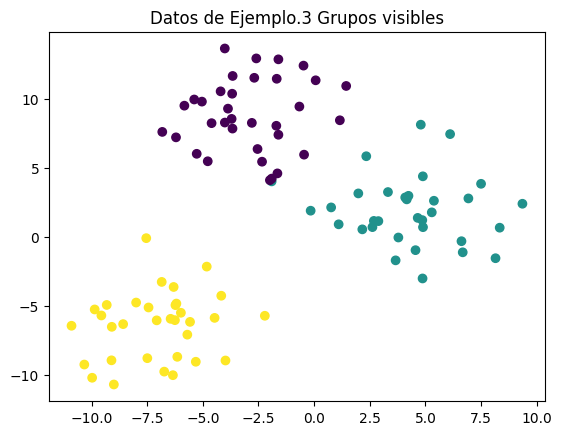

In [12]:
#Dataset base: puntos en 2D

X, y= make_blobs(n_samples=100,centers=3,random_state=42,cluster_std=2.5)
#Qué hace esto?
plt.scatter(X[:,0],X[0:,1],c=y, cmap='viridis')
plt.title('Datos de Ejemplo.3 Grupos visibles')
plt.show()

Este gráfico representa el espacio geométrico donde KNN “vive”.
Cada punto es una observación y su posición (distancia a otros) determinará su clasificación. Aquí empieza la intuición de la distancia euclidiana.

## Ejercicio 1: Explorar la importancia de la distancia y el escalado

In [13]:
#Crea dos copias del dataset: una sin escalar y otra escalada con StandardScaler().

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

#Sin escalar
knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_train,y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test,y_pred_raw)

#Escalado
#Qué hace el escalado?
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

knn_scaled= KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy sin escalar: {acc_raw}')
print(f'Accuracy escalada: {acc_scaled}')
#Cómo se interpretan los accuracy?

Accuracy sin escalar: 1.0
Accuracy escalada: 0.9666666666666667


## Ejercicio 2: Cómo cambia el modelo al variar “K”

Entrena el modelo con diferentes valores de K (1, 5, 15).

Muestra cómo cambia la frontera de decisión.

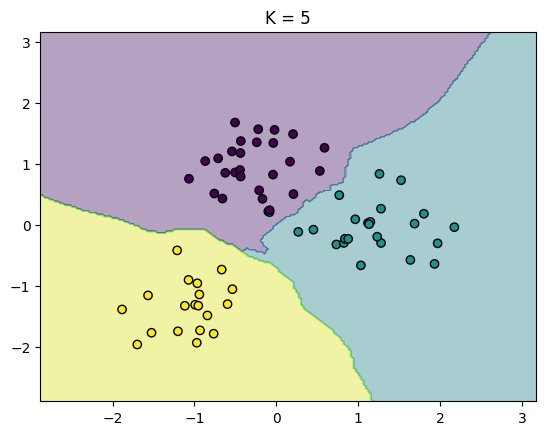

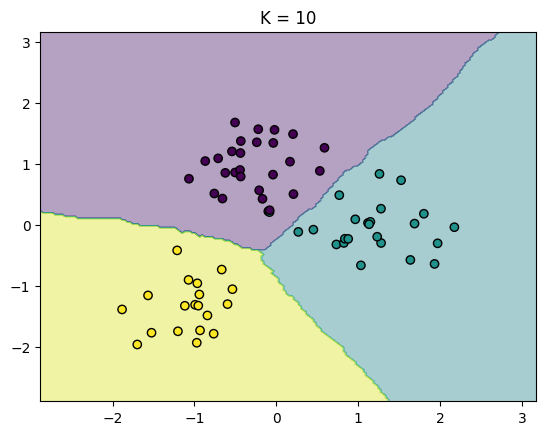

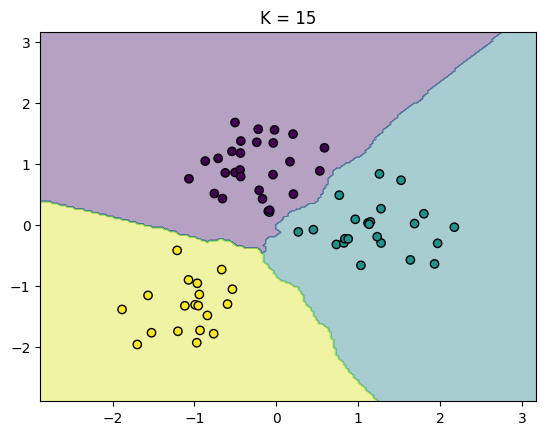

In [14]:
def plt_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    #Crear malla para visualizar
    x_min,x_max = X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
    y_min, y_max =X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,200),
                        np.linspace(y_min,y_max,200))
    Z= knn.predict(np.c_[xx.ravel(),yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z, alpha=0.4, cmap='viridis')
    plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='viridis',edgecolor='k')
    plt.title(f'K = {k}')
    plt.show()

for k in [5,10,15]:
    plt_knn(k)

## Ejercicio 3: Midiendo el equilibrio bias–variance con métricas

Instrucciones:

Usa los mismos valores de K (1, 5, 15).

Calcula accuracy en train y test y observa las diferencias.

In [15]:
for k in [1,5,15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

    print(f'K={k}: Train: {train_acc:.2f}| Test: {test_acc:.2f}')

K=1: Train: 1.00| Test: 0.97
K=5: Train: 0.99| Test: 0.97
K=15: Train: 0.99| Test: 0.97


## Ejercicio 4 (reflexivo): Encontrar el “K ideal”

Instrucciones:

Prueba valores de K del 1 al 20.

Grafica la precisión del conjunto de test.

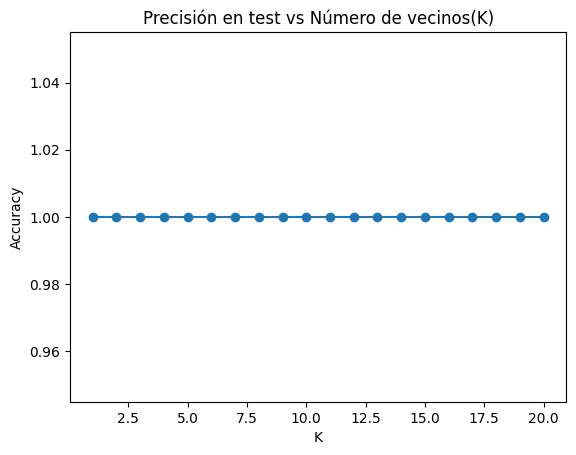

In [11]:
k_values = range(1,21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(accuracy_score(y_test,knn.predict(X_test_scaled)))

plt.plot(k_values,accuracies,marker='o')
plt.title('Precisión en test vs Número de vecinos(K)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()